# **Needs Analysis for JUMP Camp**

JUMP Camp is a project proposed by the University of San Carlos - Computer Engineering Council that seeks to educate and develop the technical skills of the youth especially in basic and fundamental computer skills such as General Computer Knowledge, Word Processing, Spreadsheets, Email, Computer Conferencing, Mail Groups, and WWW. This Exploratory Data Analysis project is in compliance with the requirement to provide data to back up the needs assessment of the project in order for it to push through.

The project seeks to answer the following questions:
1. What is the average cumulative score of the respondents per category?
2. What is the distribution of scores for each category and the overall test?
3. Which categories do the respondents struggle with?
4. Which ages need the most help?



# **Setup**
Next cell imports all Python libraries needed for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# **Import dataset**

The dataset contains the name of the respondent, age, and a binary representation of the "Yes" or "No" answers they provided to the survey given.

In [2]:
res_data = pd.read_csv("../data/test_results.csv")
res_data

,Name,Age,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,...,q_31,q_32,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_40
0,Magan,18,0,0,0,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,0
1,Jhon Gail,18,0,1,1,1,1,1,0,0,...,1,1,1,1,1,1,0,0,1,0
2,Joy,16,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3,Irene,17,1,0,1,1,0,1,0,0,...,1,1,1,0,1,1,1,0,0,0
4,Renalyn,17,0,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,Mark,20,0,1,1,1,1,1,1,1,...,1,1,0,0,1,0,0,0,1,0
6,Renzykneill Cabradilla,15,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
7,Cana,17,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,0,1,1,0
8,Judy,13,0,0,1,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
9,Amariza,14,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0


# **Plots and Analysis**

### 1. What is the average cumulative score of the respondents per category?

In [3]:
# Set up dictionary for mean values

means = dict()

In [4]:
# Calculating average cumulative score for General Computer Knowledge

means['General Computer Knowledge'] = res_data.loc[:,"q_1":"q_10"].sum().sum() / len(res_data.index)
means['General Computer Knowledge']

4.55

In [5]:
# Calculating average cumulative score for Word Processing

means['Word Processing'] = res_data.loc[:,"q_11":"q_20"].sum().sum() / len(res_data.index)
means['Word Processing']

4.95

In [6]:
# Calculating average cumulative score for Spreadsheets

means['Spreadsheets'] = res_data.loc[:,"q_21":"q_30"].sum().sum() / len(res_data.index)
means['Spreadsheets']

1.1

In [7]:
# Calculating average cumulative score for Communications and Surfing

means['Communications and Surfing'] = res_data.loc[:,"q_31":"q_40"].sum().sum() / len(res_data.index)
means['Communications and Surfing']

5.3

Text(0.5, 0, 'Category Name')

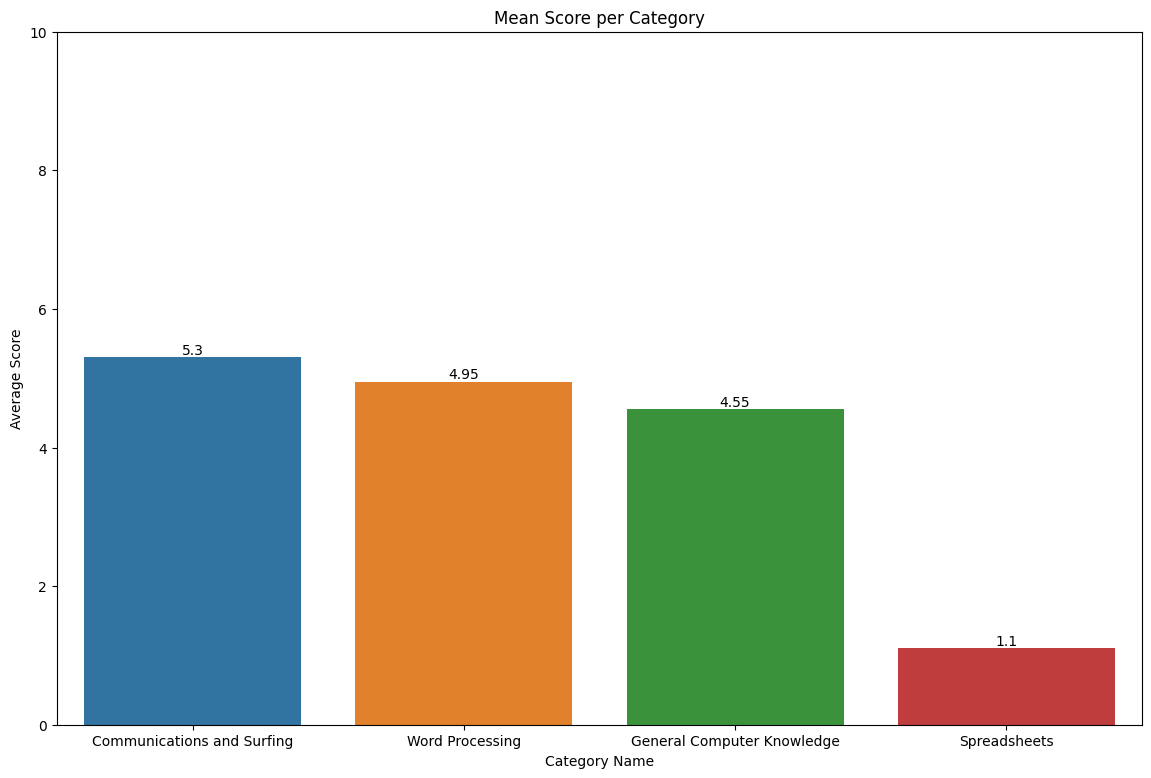

In [8]:
# Plot a bar plot for mean score per category

mean_data = pd.Series(means).sort_values(ascending=False)
plt.figure(figsize=(14,9))
plt.title("Mean Score per Category")
g = sns.barplot(x=mean_data.index, y=mean_data.values)
g.bar_label(g.containers[0])
g.set_ylim(0, 10)
g.set_ylabel("Average Score")
g.set_xlabel("Category Name")

The averages represented here are the amount of `Yes` answers in the questions of the specific category. Across the 4 categories, the respondents seem to score best with Communications and Surfing at an average of 5.3. They scored the worst with Spreadsheets at an average of 1.1. A point of concern is that only Communications and Surfing has achieved a mean past the half of the amount of questions which is 10 each. 

### 2. What is the distribution of scores for each category and the overall test?

In [9]:
# Get sum of scores per category per student

res_data["Total_General_Comp_Knowledge"] = res_data.loc[:,"q_1":"q_10"].sum(axis=1)
res_data["Total_Word_Proc"] = res_data.loc[:,"q_11":"q_20"].sum(axis=1)
res_data["Total_Spreadsheets"] = res_data.loc[:,"q_21":"q_30"].sum(axis=1)
res_data["Total_Comms_Surfing"] = res_data.loc[:,"q_31":"q_40"].sum(axis=1)
res_data

,Name,Age,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,...,q_35,q_36,q_37,q_38,q_39,q_40,Total_General_Comp_Knowledge,Total_Word_Proc,Total_Spreadsheets,Total_Comms_Surfing
0,Magan,18,0,0,0,1,1,1,0,1,...,1,1,0,0,1,0,5,8,2,7
1,Jhon Gail,18,0,1,1,1,1,1,0,0,...,1,1,0,0,1,0,5,7,0,7
2,Joy,16,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,8,9,2,10
3,Irene,17,1,0,1,1,0,1,0,0,...,1,1,1,0,0,0,4,4,0,6
4,Renalyn,17,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
5,Mark,20,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0,8,6,0,4
6,Renzykneill Cabradilla,15,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,2,1,0,3
7,Cana,17,0,0,0,1,0,1,0,0,...,1,1,0,1,1,0,2,4,0,6
8,Judy,13,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,4,5,0,3
9,Amariza,14,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,2,0,2


Text(0, 0.5, 'Count')

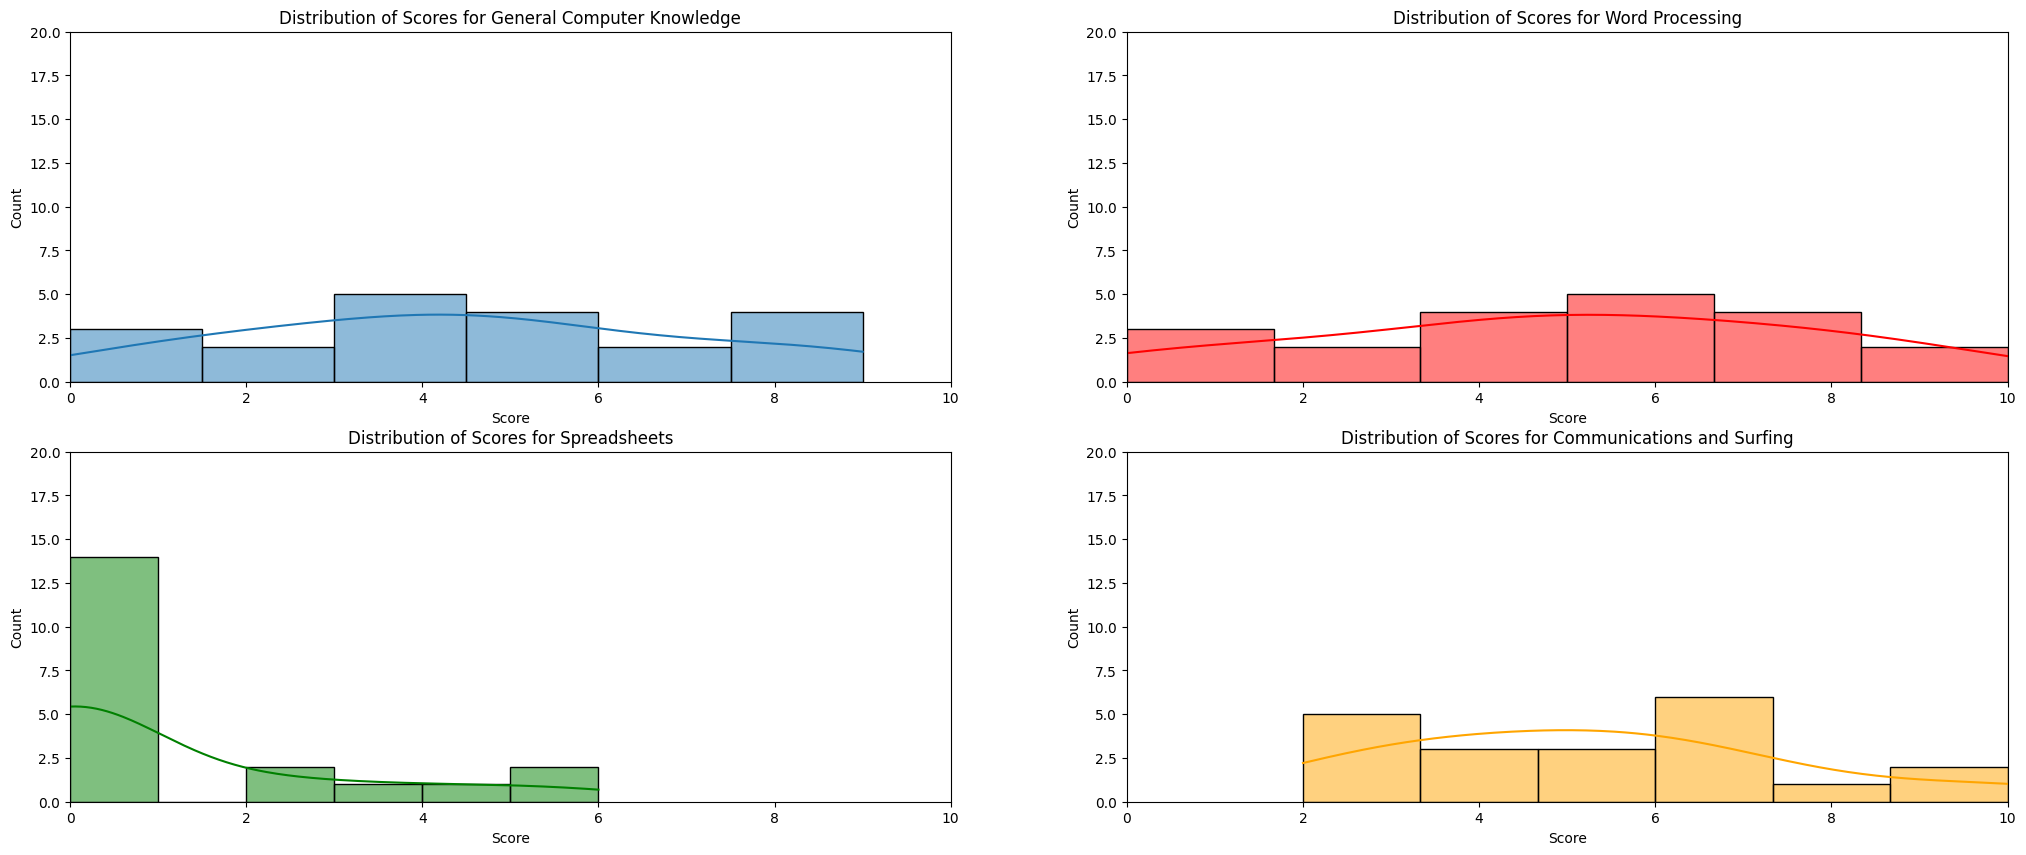

In [10]:
# Plot distribution plots for each category

fig, ax = plt.subplots(2, 2, figsize=(25,10))

plt.subplot(2, 2, 1)
plt.title("Distribution of Scores for General Computer Knowledge")
g = sns.histplot(data=res_data['Total_General_Comp_Knowledge'], kde=True)
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 2)
plt.title("Distribution of Scores for Word Processing")
g = sns.histplot(data=res_data['Total_Word_Proc'], kde=True, color="red")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 3)
plt.title("Distribution of Scores for Spreadsheets")
g = sns.histplot(data=res_data['Total_Spreadsheets'], kde=True, color="green")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 4)
plt.title("Distribution of Scores for Communications and Surfing")
g = sns.histplot(data=res_data['Total_Comms_Surfing'], kde=True, color="orange")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

In [11]:
# TODO: Calculate skewness and kurtosis of each category
# TODO: Make distribution for ages